In [1]:
#Importing all necessary packages
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from pandas import read_excel, merge
from IPython.core.display import HTML
css_file = 'style.css'
from numpy import nan
import sklearn
#import plotly.graph_objs as go
#from plotly.offline import init_notebook_mode, iplot 
#init_notebook_mode()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sn
from scipy import stats
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pylab as pl
import matplotlib.patches as mpatches
%matplotlib inline
from sklearn.preprocessing import StandardScaler

#### Reading Dataset into Pandas Dataframe

In [2]:
df = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
df

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,INSTURL,NPCURL,HCM2,PREDDEG,...,RET_PTL4,PCTFLOAN,UG25ABV,MD_EARN_WNE_P10,GT_25K_P6,GRAD_DEBT_MDN_SUPP,GRAD_DEBT_MDN10YR_SUPP,RPY_3YR_RT_SUPP,C150_L4_POOLED_SUPP,C150_4_POOLED_SUPP
0,100654,100200,1002,Alabama A & M University,Normal,AL,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,0,3,...,NaN,0.8159,0.0877,29900,0.453,35000,361.891446885773,0.2458495231,NaN,0.3303
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,0,3,...,NaN,0.5218,0.2363,40200,0.669,21500,222.304745944118,0.5199110572,NaN,0.5504
2,100690,2503400,25034,Amridge University,Montgomery,AL,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,0,3,...,NaN,0.8781,0.8571,40100,0.658,23000,237.814379382079,0.2331002331,NaN,PrivacySuppressed
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,www.uah.edu,finaid.uah.edu/,0,3,...,NaN,0.4589,0.2255,45600,0.685,23500,242.984257194733,0.5490029699,NaN,0.4776
4,100724,100500,1005,Alabama State University,Montgomery,AL,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,0,3,...,NaN,0.7692,0.0974,26700,0.393,32091,331.813097771753,0.1963538553,NaN,0.2663
5,100751,105100,1051,The University of Alabama,Tuscaloosa,AL,www.ua.edu/,financialaid.ua.edu/net-price-calculator/,0,3,...,NaN,0.4059,0.0810,42700,0.695,23750,245.56919610106,0.5911430119,NaN,0.6638
6,100760,100700,1007,Central Alabama Community College,Alexander City,AL,www.cacc.edu,www.cacc.edu/NetPriceCalculator/14-15/npcalc.html,0,2,...,0.5397,0.3574,0.2630,27200,0.466,9388,97.0696258103897,0.263502455,0.1722,NaN
7,100812,100800,1008,Athens State University,Athens,AL,www.athens.edu,https://24.athens.edu/apex/prod8/f?p=174:1:394...,0,3,...,NaN,0.6512,0.6774,38500,0.653,18534,191.637030759455,0.4942462601,NaN,NaN
8,100830,831000,8310,Auburn University at Montgomery,Montgomery,AL,www.aum.edu,www.aum.edu/current-students/financial-informa...,0,3,...,NaN,0.5584,0.2257,33500,0.616,22192.5,229.465026714643,0.4162696959,NaN,0.2115
9,100858,100900,1009,Auburn University,Auburn,AL,www.auburn.edu,www.auburn.edu/admissions/money-matters.html,0,3,...,NaN,0.3470,0.0427,47100,0.741,21500,222.304745944118,0.731666973,NaN,0.7188


In [3]:
df.describe()

,UNITID,OPEID,OPEID6,HCM2,PREDDEG,HIGHDEG,CONTROL,LOCALE,HBCU,PBI,...,NPT43_PRIV,NPT44_PRIV,NPT45_PRIV,PCTPELL,RET_FT4,RET_FTL4,RET_PT4,RET_PTL4,PCTFLOAN,UG25ABV
count,7.593000e+03,7.593000e+03,7593.000000,7593.000000,7593.000000,7593.000000,7593.000000,7147.000000,7147.000000,7147.000000,...,3287.000000,2686.000000,2138.000000,6835.000000,2245.000000,3766.000000,1392.000000,2128.000000,6835.000000,6788.000000
mean,1.765726e+06,1.910166e+06,16441.276307,0.009219,1.810088,2.202292,2.192282,19.656359,0.014272,0.014691,...,20289.748403,23030.454579,25517.280636,0.521227,0.711980,0.686508,0.471825,0.552693,0.508921,0.410651
std,6.771661e+06,3.516382e+06,14088.868371,0.095578,1.031903,1.318152,0.835941,9.415183,0.118617,0.120323,...,7061.082071,6703.112694,8046.285002,0.224468,0.192955,0.182598,0.295555,0.262058,0.281004,0.234110
min,1.006540e+05,1.002000e+05,1002.000000,0.000000,0.000000,0.000000,1.000000,-3.000000,0.000000,0.000000,...,-7086.000000,-1061.000000,725.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000400
25%,1.752630e+05,3.402000e+05,3395.000000,0.000000,1.000000,1.000000,1.000000,12.000000,0.000000,0.000000,...,15870.500000,18660.750000,20040.500000,0.350050,0.626800,0.571400,0.285700,0.380350,0.313850,0.234625
50%,2.318730e+05,1.054211e+06,10490.000000,0.000000,2.000000,2.000000,2.000000,21.000000,0.000000,0.000000,...,19921.000000,22790.500000,24573.000000,0.509200,0.744200,0.692300,0.466700,0.500000,0.568200,0.394250
75%,4.496120e+05,3.010617e+06,26092.000000,0.000000,3.000000,4.000000,3.000000,22.000000,0.000000,0.000000,...,24639.000000,27036.500000,29453.250000,0.697950,0.834300,0.818200,0.666700,0.750000,0.728150,0.577475
max,4.862110e+07,8.209884e+07,42542.000000,1.000000,4.000000,4.000000,3.000000,43.000000,1.000000,1.000000,...,95017.000000,91832.000000,95165.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Following are the identified outliers from the observed Dataset:
##### 1:  NPT43_PRIV
##### 2:  NPT44_PRIV
##### 3: NPT45_PRIV	

In [4]:
df.shape

(7593, 123)

##### Dropping all columns that whose columns have all NULL values

In [5]:
# Dropping all columns that whose columns have all NULL values
df= df.dropna(axis=1, how='all')

##### Displaying a list of all NULL values across all columns

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
INSTURL                     20
NPCURL                     518
HCM2                         0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
LOCALE                     446
HBCU                       446
PBI                        446
ANNHI                      446
TRIBAL                     446
AANAPII                    446
HSI                        446
NANTI                      446
MENONLY                    446
WOMENONLY                  446
RELAFFIL                  6684
SATVR25                   6400
SATVR75                   6400
SATMT25                   6391
SATMT75                   6391
SATWR25                   6860
SATWR75                   6860
SATVRMID                  6400
SATMTMID                  6391
SATWRMID                  6860
ACTCM25 

In [2]:
#Linear Interpolation for missing data: ‘linear’: ignore the index and treat the values as equally spaced. This is the only 
df = df.interpolate(method='linear')

NameError: name 'df' is not defined

##### Plotting the Linear Interpolation of the missing data

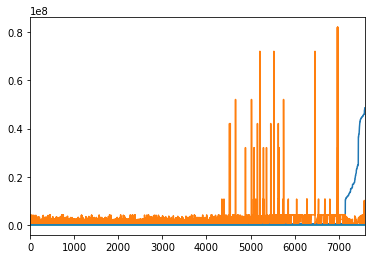

In [8]:
#Plotting the Linear Interpolation of the missing data
df.plot(legend=False)

In [9]:
plt.show()

##### Rechecking the Status of Missing values

In [10]:
#After applying Interpolate Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

UNITID                       0
OPEID                        0
OPEID6                       0
INSTNM                       0
CITY                         0
STABBR                       0
INSTURL                     20
NPCURL                     518
HCM2                         0
PREDDEG                      0
HIGHDEG                      0
CONTROL                      0
LOCALE                       0
HBCU                         0
PBI                          0
ANNHI                        0
TRIBAL                       0
AANAPII                      0
HSI                          0
NANTI                        0
MENONLY                      0
WOMENONLY                    0
RELAFFIL                     2
SATVR25                      0
SATVR75                      0
SATMT25                      0
SATMT75                      0
SATWR25                      0
SATWR75                      0
SATVRMID                     0
SATMTMID                     0
SATWRMID                     0
ACTCM25 

##### Checking the data types of all the columns

In [11]:
#Finding out the datatypes of the dataframe
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.dtypes)

UNITID                      int64
OPEID                       int64
OPEID6                      int64
INSTNM                     object
CITY                       object
STABBR                     object
INSTURL                    object
NPCURL                     object
HCM2                        int64
PREDDEG                     int64
HIGHDEG                     int64
CONTROL                     int64
LOCALE                    float64
HBCU                      float64
PBI                       float64
ANNHI                     float64
TRIBAL                    float64
AANAPII                   float64
HSI                       float64
NANTI                     float64
MENONLY                   float64
WOMENONLY                 float64
RELAFFIL                  float64
SATVR25                   float64
SATVR75                   float64
SATMT25                   float64
SATMT75                   float64
SATWR25                   float64
SATWR75                   float64
SATVRMID      

##### Feature extraction: In this step, only the relevant features from the dataset, that are play a role in determining the overall value of a college. 

In [12]:
#Copying the contents of df into a dataframe d
d = df.iloc[:,8:116]
d = d.ffill()

In [13]:
#Dropping all NULL values from the dataframe d
d = d.dropna()

##### Rechecking the Status of Missing values

In [14]:
#Checking the number of Null Values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(d.isnull().sum())

HCM2            0
PREDDEG         0
HIGHDEG         0
CONTROL         0
LOCALE          0
HBCU            0
PBI             0
ANNHI           0
TRIBAL          0
AANAPII         0
HSI             0
NANTI           0
MENONLY         0
WOMENONLY       0
RELAFFIL        0
SATVR25         0
SATVR75         0
SATMT25         0
SATMT75         0
SATWR25         0
SATWR75         0
SATVRMID        0
SATMTMID        0
SATWRMID        0
ACTCM25         0
ACTCM75         0
ACTEN25         0
ACTEN75         0
ACTMT25         0
ACTMT75         0
ACTWR25         0
ACTWR75         0
ACTCMMID        0
ACTENMID        0
ACTMTMID        0
ACTWRMID        0
SAT_AVG         0
SAT_AVG_ALL     0
PCIP01          0
PCIP03          0
PCIP04          0
PCIP05          0
PCIP09          0
PCIP10          0
PCIP11          0
PCIP12          0
PCIP13          0
PCIP14          0
PCIP15          0
PCIP16          0
PCIP19          0
PCIP22          0
PCIP23          0
PCIP24          0
PCIP25          0
PCIP26    

##### Checking the number of rows and columns in the dataframe

In [15]:
d.shape

(7583, 108)

### Making Visualizations on the dataset

###### Resetting the size parameters of the graph to be displayed 

In [16]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


In [17]:
#Making a copy of dataframe d to x
x = d.copy()

#### Finding out what percent of U.S. Colleges comply to Hieghtened Cash Management

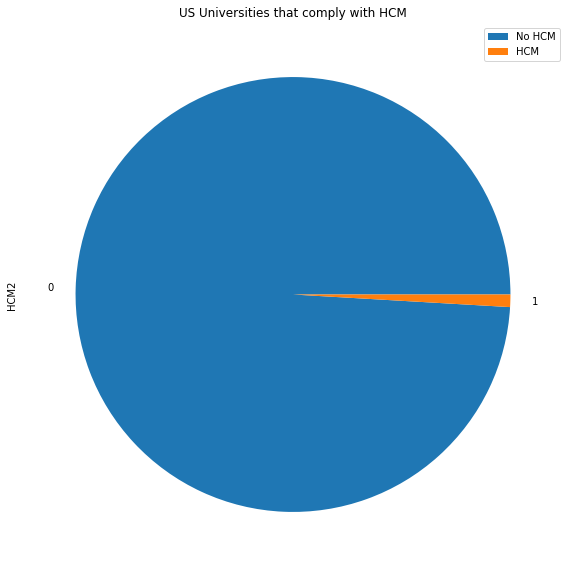

In [54]:
#Finding out what percent of U.S. Colleges comply to Hieghtened Cash Management
x["HCM2"].value_counts().plot.pie()
plt.title("US Universities that comply with HCM")
plt.legend(["No HCM", "HCM"])
plt.gca().set_aspect("equal")

#### Filtering out the names of the institutions that comply with HCM

In [19]:
dx = pd.read_csv('Most-Recent-Cohorts-Scorecard-Elements.csv')
dx.loc[dx['HCM2'] == 1, 'INSTNM']

128                              Arkansas Baptist College
281                               Milan Institute-Visalia
363                                    Lincoln University
503                                South Baylo University
571                               Glenwood Beauty Academy
806                            Taylor Technical Institute
849                                  Carver Bible College
916                       Med-Assist School of Hawaii Inc
917                              World Medicine Institute
960            La James International College-East Moline
1223                           Hamilton Technical College
1230           American College of Hairstyling-Des Moines
1237           La James International College-Cedar Falls
1238              La James International College-Johnston
1240              La James International College-Ft Dodge
1260             La James International College-Davenport
1261             La James International College-Iowa City
1418          

#### Resetting the size parameters of the graph to be displayed to 20*20

In [20]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 6.0]


##### Displaying the area plot of the distribution of those colleges whose populations are predominantly ethinic minorities

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E18C550>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000F528208>], dtype=object)

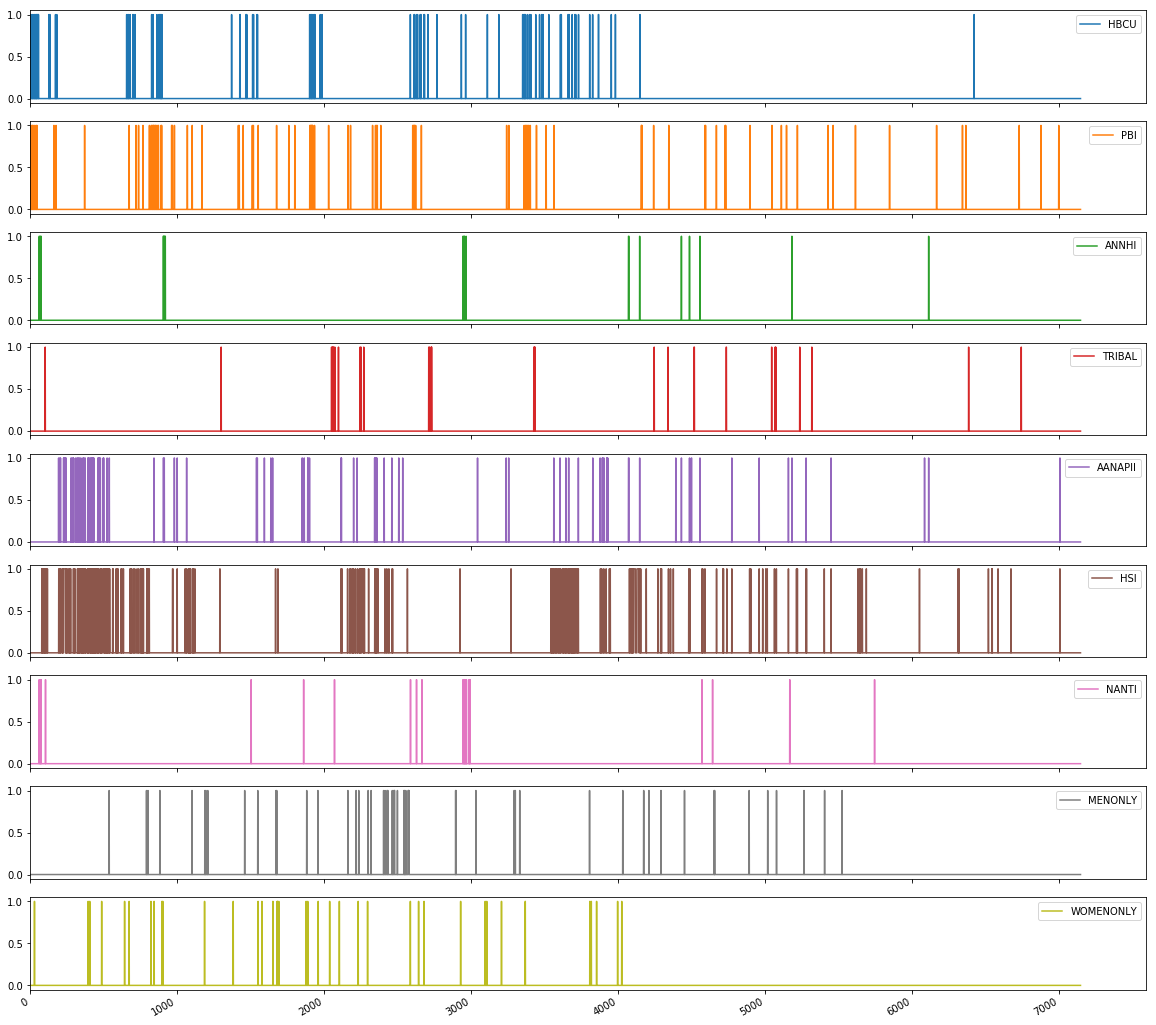

In [21]:
dx.plot(x=dx.index, y=["HBCU", "PBI", "ANNHI", "TRIBAL", "AANAPII", "HSI","NANTI","MENONLY","WOMENONLY"], kind="line",subplots=True)

##### We observe that Hispanic Serving Institutions (HSI) are much more in number as compared to other minority colleges  

##### Resetting the size parameters of the graph to 10*10

In [33]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

Current size: [20.0, 20.0]


##### Displaying the distribution of SAT scores of students in the form of box plots

SATVR25       AxesSubplot(0.125,0.125;0.110714x0.755)
SATVR75    AxesSubplot(0.257857,0.125;0.110714x0.755)
SATMT25    AxesSubplot(0.390714,0.125;0.110714x0.755)
SATMT75    AxesSubplot(0.523571,0.125;0.110714x0.755)
SATWR25    AxesSubplot(0.656429,0.125;0.110714x0.755)
SATWR75    AxesSubplot(0.789286,0.125;0.110714x0.755)
dtype: object

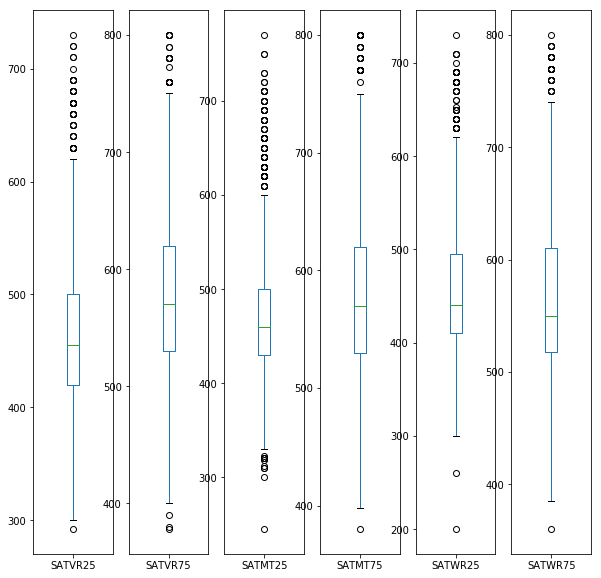

In [46]:
dx.plot(x=dx.index, y=["SATVR25","SATVR75","SATMT25","SATMT75","SATWR25","SATWR75"], subplots=True,kind='box')

##### The above box plots display the distribution of 25th  and 75th percentile of SATVR (Critical Reading), SATMT (Mathematics) and SATWR (Writing) scores of all students studying across all colleges.   

ACTCM25       AxesSubplot(0.125,0.125;0.0824468x0.755)
ACTCM75    AxesSubplot(0.223936,0.125;0.0824468x0.755)
ACTEN25    AxesSubplot(0.322872,0.125;0.0824468x0.755)
ACTEN75    AxesSubplot(0.421809,0.125;0.0824468x0.755)
ACTMT25    AxesSubplot(0.520745,0.125;0.0824468x0.755)
ACTMT75    AxesSubplot(0.619681,0.125;0.0824468x0.755)
ACTWR25    AxesSubplot(0.718617,0.125;0.0824468x0.755)
ACTWR75    AxesSubplot(0.817553,0.125;0.0824468x0.755)
dtype: object

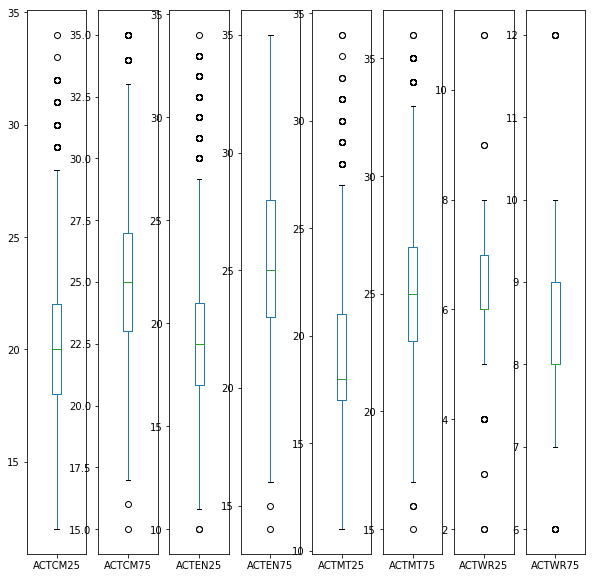

In [48]:
# ACT Scores
dx.plot(x=dx.index, y=["ACTCM25","ACTCM75","ACTEN25","ACTEN75","ACTMT25","ACTMT75","ACTWR25","ACTWR75"], subplots=True,kind='box')

##### The above box plots display the distribution of 25th and 75th percentile of ACTVR (Critical Reading), ACTMT (Mathematics) and ACTWR (Writing) scores of all students studying across all colleges.

##### Displaying what percent of U.S. Colleges provide Distance Education

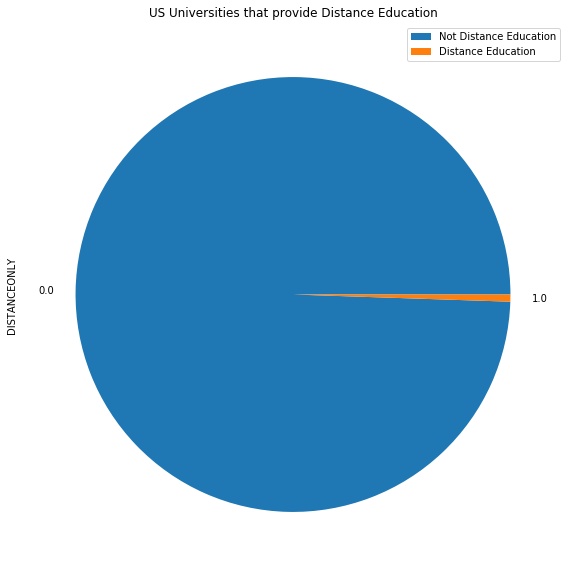

In [53]:
#Finding out what percent of U.S. Colleges provide Distance Education
x["DISTANCEONLY"].value_counts().plot.pie()
plt.legend(["Not Distance Education", "Distance Education"])
plt.title("US Universities that provide Distance Education")
plt.gca().set_aspect("equal")

##### Displaying the area distribution of enrollment of undergraduate certificate/degree-seeking students

Text(0,0.5,'No. Of Students')

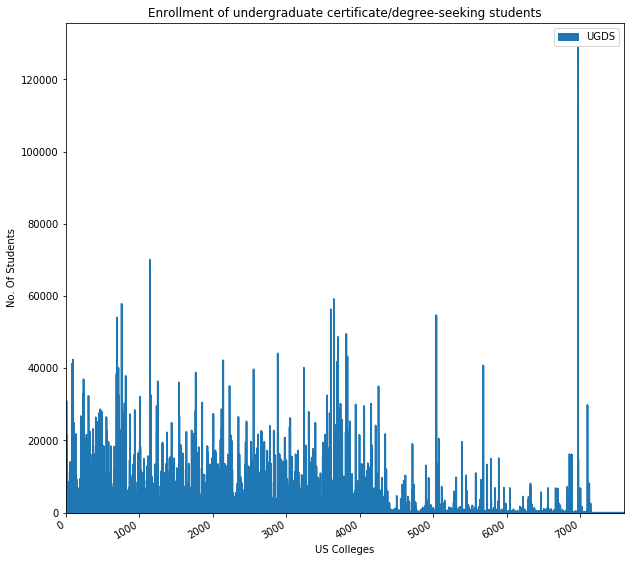

In [62]:
dx.plot(x=dx.index, y=["UGDS"], kind="area",subplots=True)
plt.title("Enrollment of undergraduate certificate/degree-seeking students")
plt.xlabel("US Colleges")
plt.ylabel("No. Of Students")

##### Resetting the figure size to 20 *20

In [76]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 20
fig_size[1] = 20
plt.rcParams["figure.figsize"] = fig_size

Current size: [70.0, 70.0]


##### Displaying the area distribution of various ethnicities for all undergraduate degree seeking students. 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000F5270A90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x00000000F64760F0>], dtype=object)

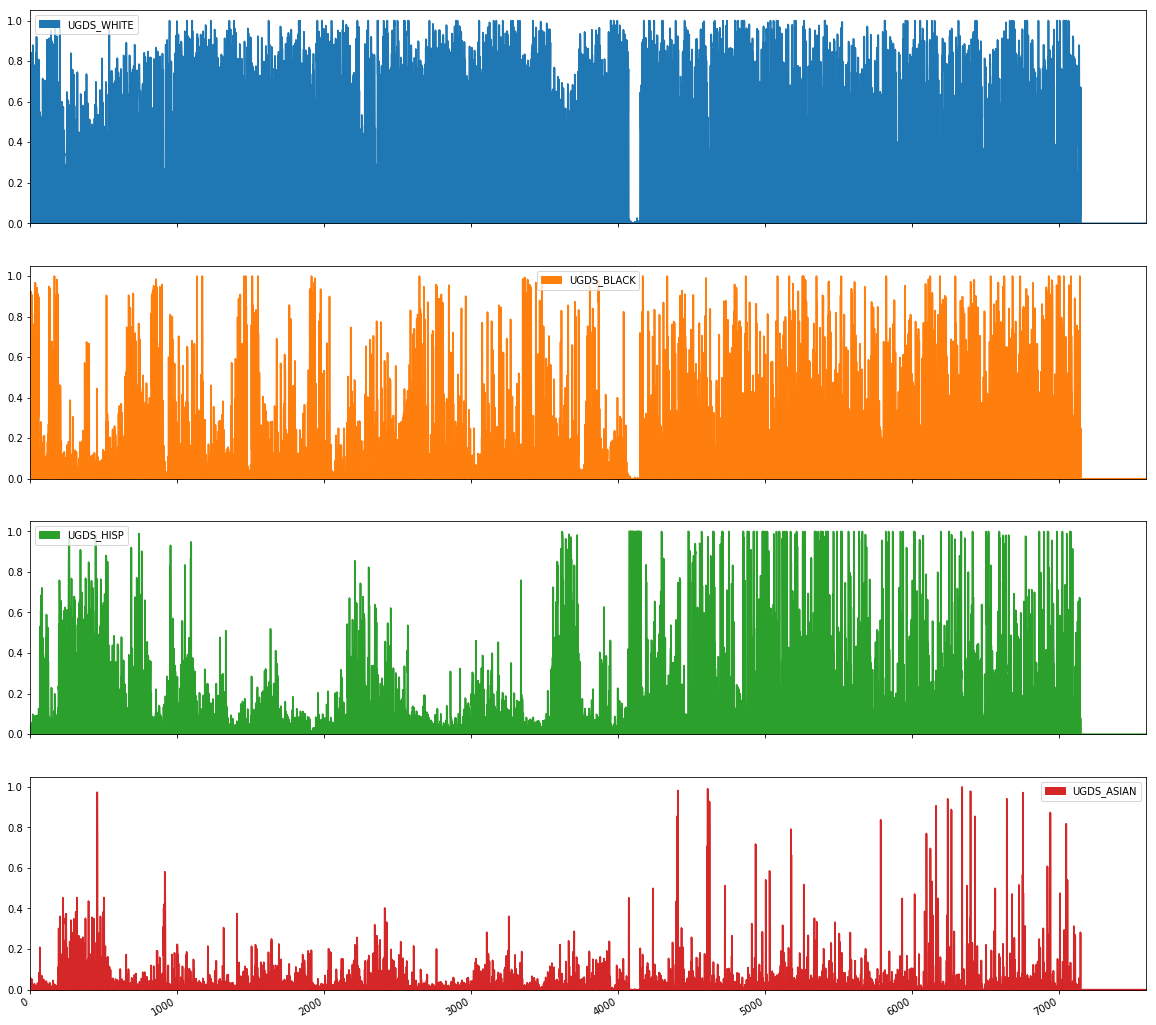

In [77]:
dx.plot(x=dx.index, y=["UGDS_WHITE","UGDS_BLACK","UGDS_HISP","UGDS_ASIAN"], kind="area",subplots=True)

#### Resizing the figure size to 8*6

In [79]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 8
fig_size[1] = 6
plt.rcParams["figure.figsize"] = fig_size

Current size: [20.0, 20.0]


#### Displaying the percentages of Operating versus Non-Operating Institutions in US

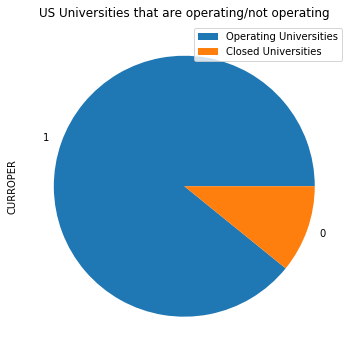

In [81]:
#Currently Operating Schools
#Finding out what percent of U.S. Colleges provide Distance Education
x["CURROPER"].value_counts().plot.pie()
plt.legend(["Operating Universities", "Closed Universities"])
plt.title("US Universities that are operating/not operating")
plt.gca().set_aspect("equal")

#### Resizing the figure size to 30*30

In [82]:
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [10.0, .0]
print("Current size:", fig_size)
 
# Set figure width to 12 and height to 9
fig_size[0] = 30
fig_size[1] = 30
plt.rcParams["figure.figsize"] = fig_size

Current size: [8.0, 6.0]


##### Area distribution of various courses that are being offered in various fields such as Agriculture, Natural Resources, Ethnic Studies etc. 

Text(0.5,1,'Distribution of various Degrees awarded across all Universities')

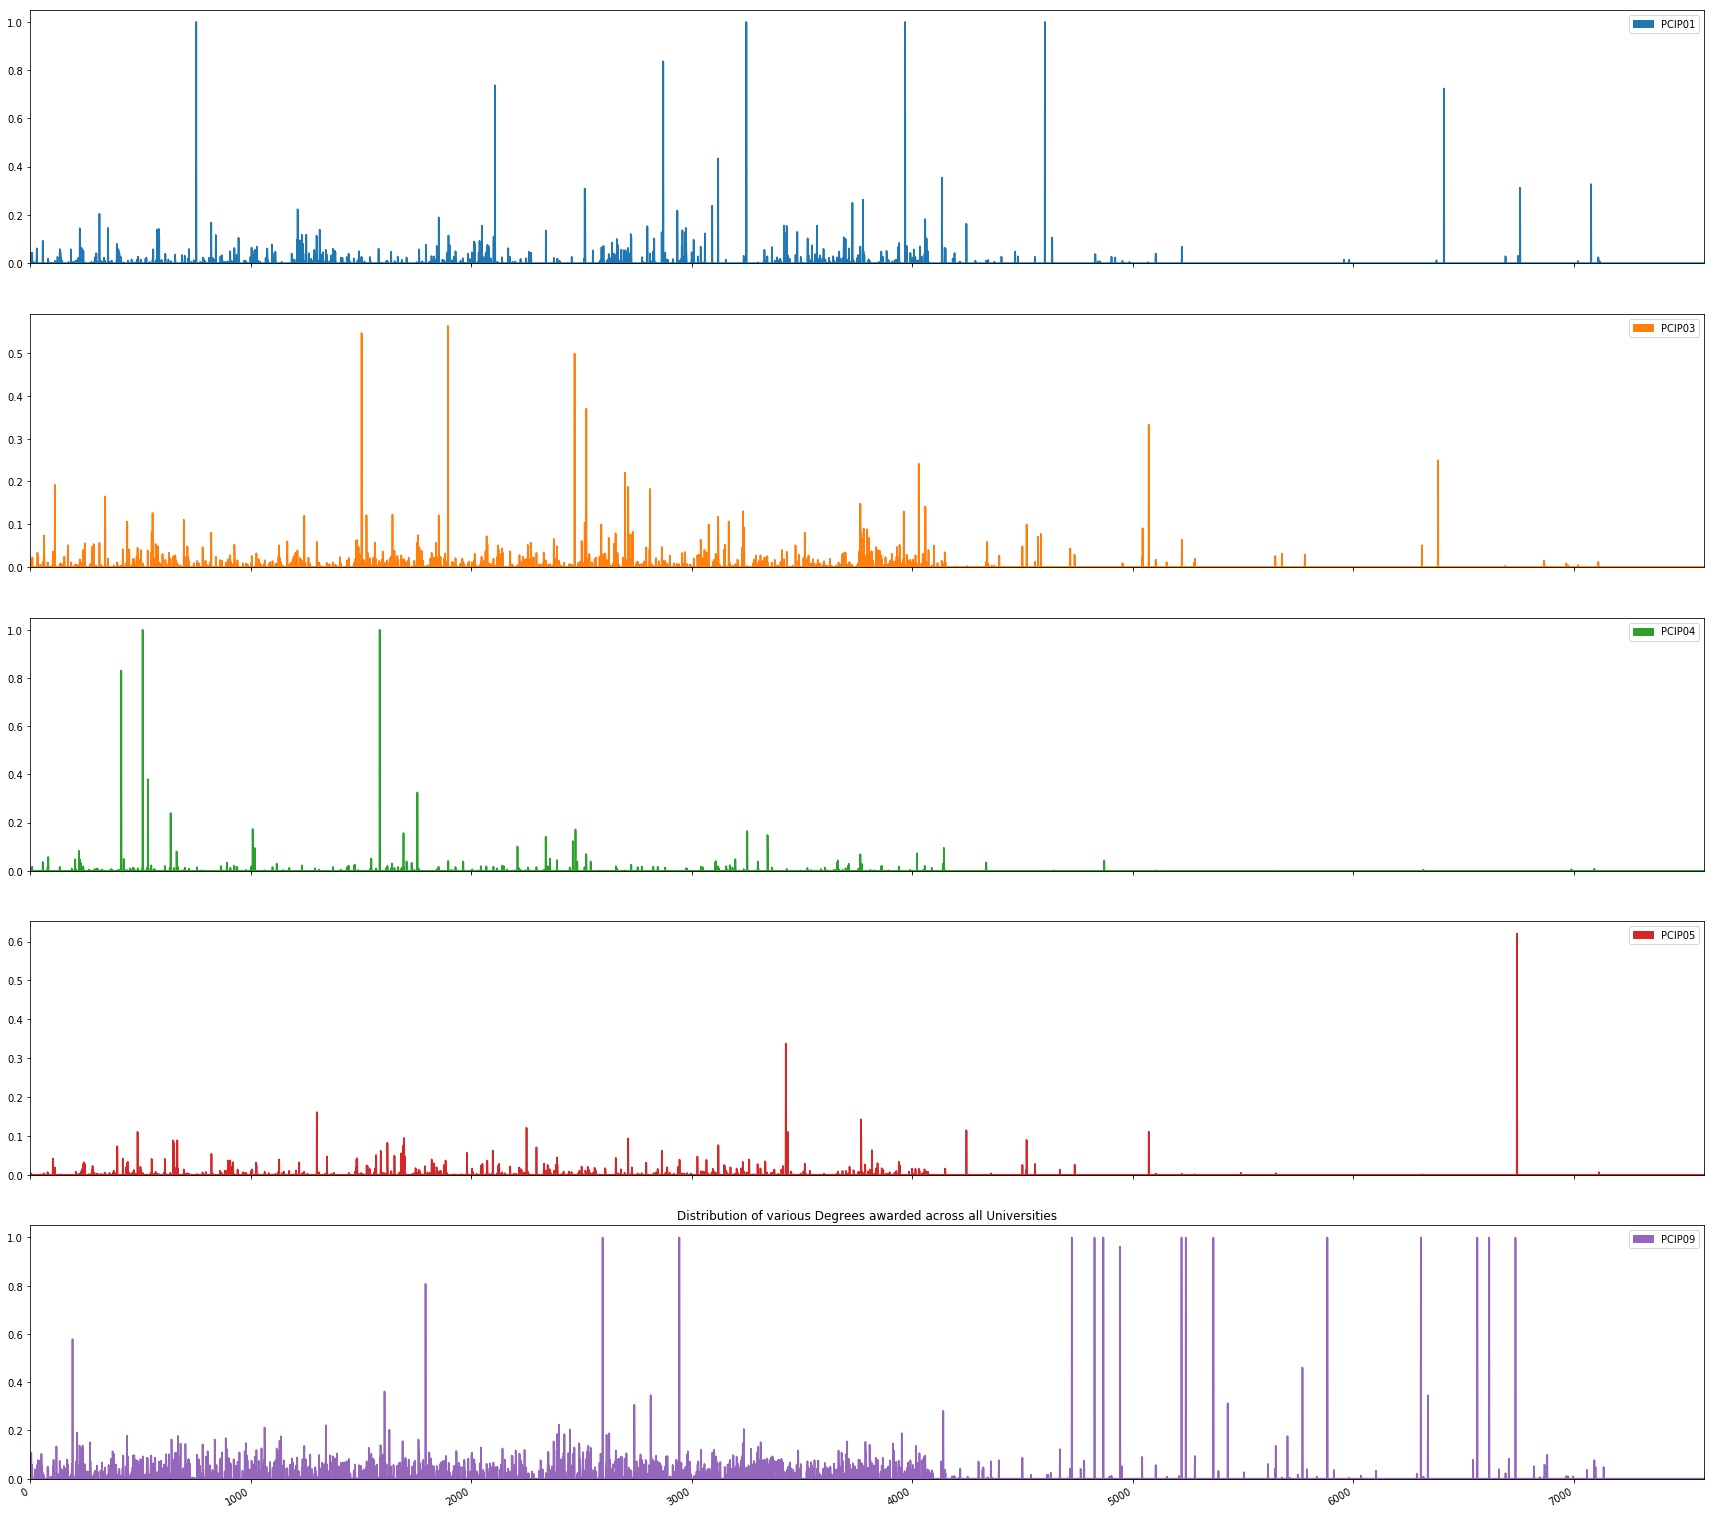

In [91]:
dx.plot(x=dx.index, y=["PCIP01","PCIP03","PCIP04","PCIP05","PCIP09"], kind="area",subplots=True)
plt.title("Distribution of various Degrees awarded across all Universities")

##### Applying Unsupervised Machine Learning to find clusters and hidden patterns in the data

In [22]:
#Creating a Feature Vector
x = d.iloc[:,:-1].values

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [23]:
standard_scalar = StandardScaler()

In [24]:
d_std = standard_scalar.fit_transform(x)

###### Finding the Number Classes using Elbow Curve

In [25]:
#We are computing the cluster errors from cluster range 1 to 20
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
  clusters = KMeans( num_clusters )
  clusters.fit( d_std )
  cluster_errors.append( clusters.inertia_ )

In [26]:
#Displaying the number of clusters along with their corresponding cluster error values
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [27]:
#Displaying the number of clusters along with their corresponding cluster error values(Only first 10)
clusters_df[0:10]

,cluster_errors,num_clusters
0,811381.000000,1
1,735580.665491,2
2,704549.963568,3
3,681913.358146,4
4,666731.212902,5
5,654870.800448,6
6,643165.179604,7
7,628559.488362,8
8,622360.957130,9
9,612896.519478,10


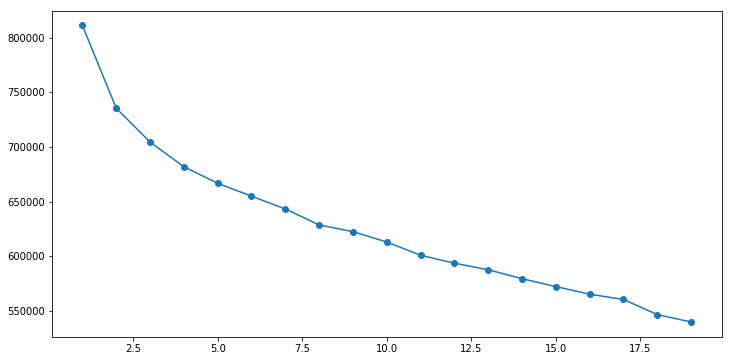

In [28]:
#Plotting the Elbow curve: 
#Y-Axis = Cost
#X-Axis = Number Of clusters
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

###### The elbow diagram shows that the gain in explained variance reduces significantly from 2 to 3 to 4. So, optimal number of clusters should be 2 . The actual number of clusters chosen can be finally based on business context and convenience of dealing with number of segments or clusters.

###### Applying K-Means Algorithm

In [29]:
df_tr_std = stats.zscore(d)

In [30]:
##Init
kmeans = KMeans(n_clusters=2, random_state=123)
##Fit
kmeans.fit(df_tr_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=123, tol=0.0001, verbose=0)

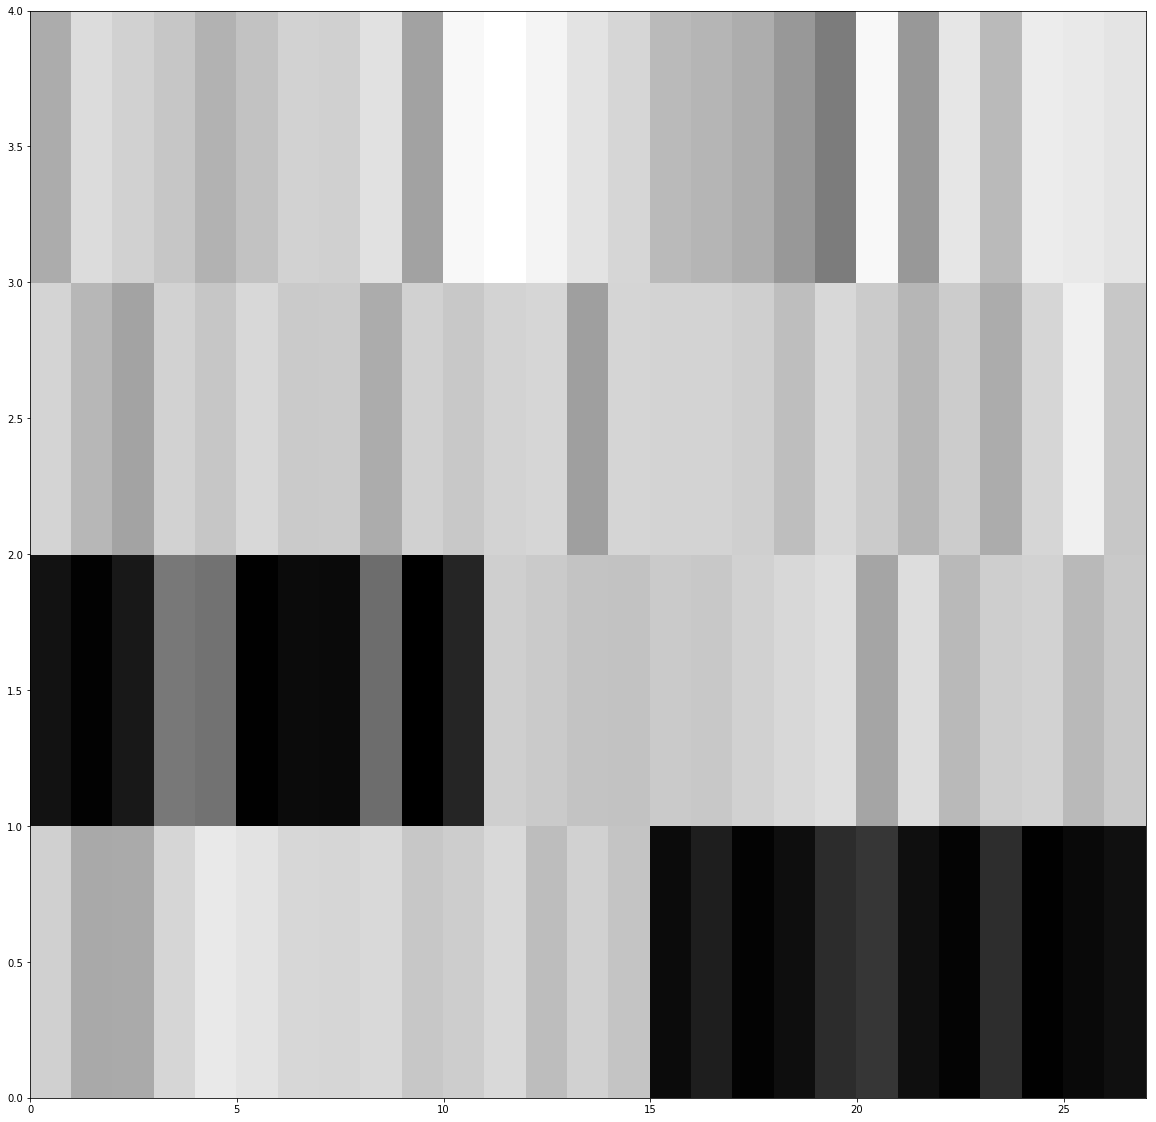

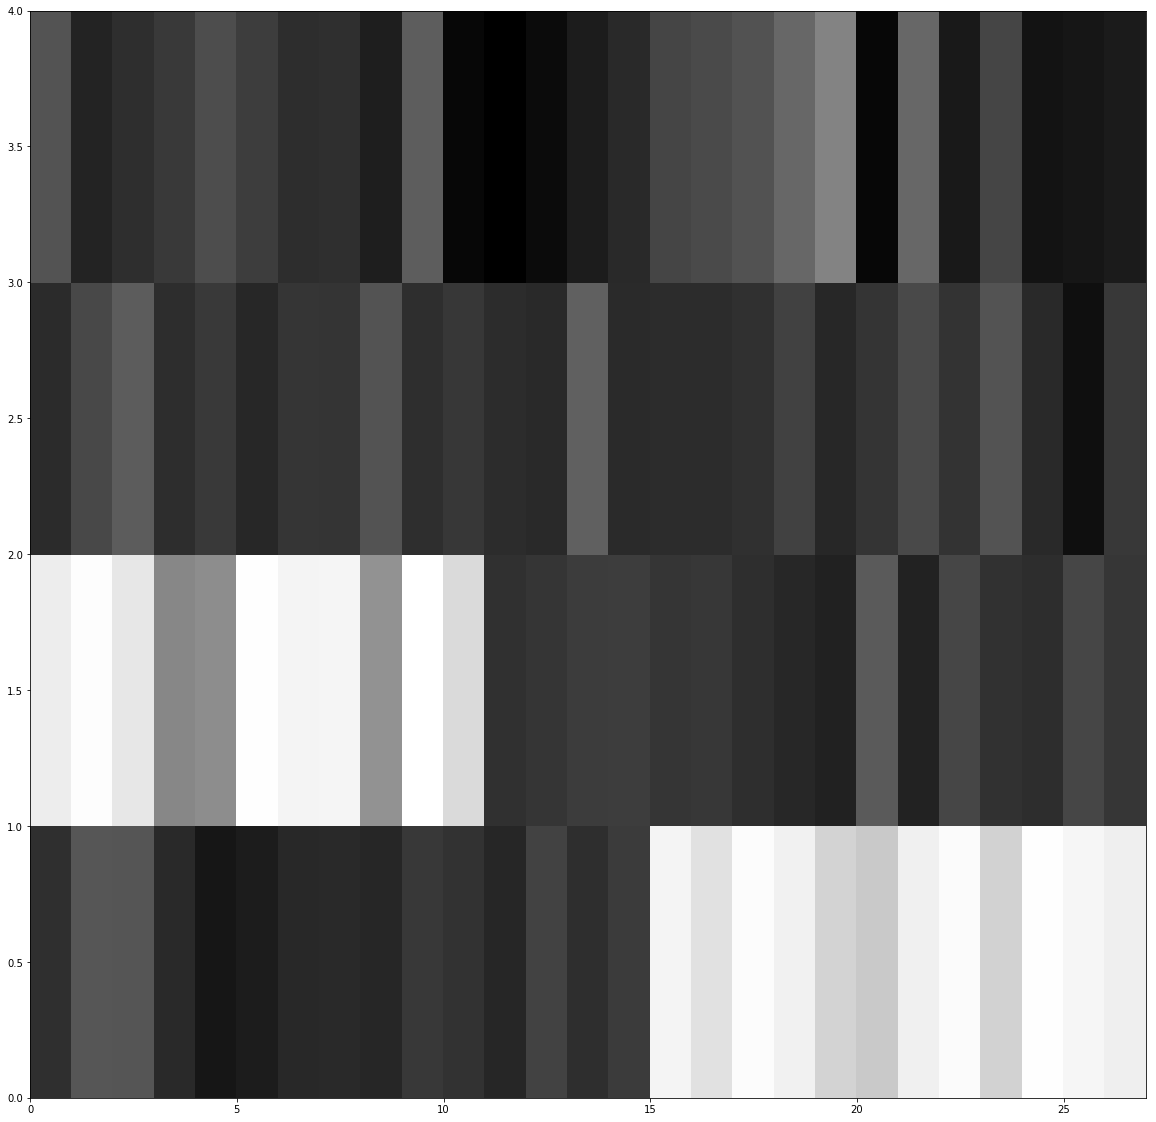

In [31]:
for i in range(2):
 plt.pcolor(np.reshape(kmeans.cluster_centers_[i,:],(4,27)))
 plt.gray()
 Black_patch = mpatches.Patch(color='white')
 White_patch = mpatches.Patch(color='black')
 #plt.legend(handles=[Black_patch,White_patch])
 plt.show()

#### Applying Distributed Stocastic Neighbor Embedding (DSNE) Machine Learning to plot 108 dimensions in a 2D plane

In [32]:
from sklearn.manifold import TSNE
from ggplot import *

C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\sinhaK5842\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

In [34]:
x_test_2D = tsne.fit_transform(d_std)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7583 samples in 0.194s...
[t-SNE] Computed neighbors for 7583 samples in 8.654s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7583
[t-SNE] Computed conditional probabilities for sample 2000 / 7583
[t-SNE] Computed conditional probabilities for sample 3000 / 7583
[t-SNE] Computed conditional probabilities for sample 4000 / 7583
[t-SNE] Computed conditional probabilities for sample 5000 / 7583
[t-SNE] Computed conditional probabilities for sample 6000 / 7583
[t-SNE] Computed conditional probabilities for sample 7000 / 7583
[t-SNE] Computed conditional probabilities for sample 7583 / 7583
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.387184
[t-SNE] Error after 300 iterations: 2.476475


##### Plotting a Scatter plot from the results obtained from above

In [35]:
df_tsne = d.copy()

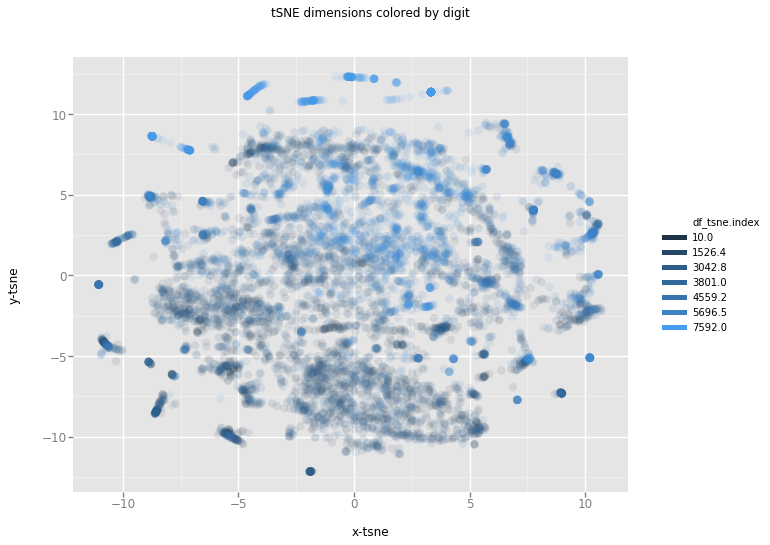

<ggplot: (-9223372036830565439)>

In [36]:

df_tsne['x-tsne'] = x_test_2D[:,0]
df_tsne['y-tsne'] = x_test_2D[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='df_tsne.index') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart